# 回帰の精度計算
- $f(x)=w_0x_0+w_1x_1$（$x_0=1$)の線形回帰モデルを考える
- 真のパラメータと評価したいパラメータをそれぞれリストで作成．
- 真のパラメータでランダムにデータを作成．
- 評価したいパラメータで予測値を計算．
- RMSE, MSE, 決定係数を計算．

In [1]:
import random
import math

In [10]:
w_t = [1, 2] # 真のパラメータ
w     = [1, 3] # 評価対象のパラメータ

### データ作成
以下のように真の関数に平均0, 標準偏差$sigma$の正規分布に従うノイズ$\epsilon$が乗ったものを観測データとして作成し返す関数`generate_data()`を実装してください。関数は真のパラメータ`w_t`、正規分布の標準偏差`sigma`、データ数`n`を引数に受け取ります。

$y=w_0x_0+w_1x_1+\epsilon$

In [3]:
# データを作成
def generate_data(w_t, sigma, n):
    X = []
    Y = []
    for i in range(n):
        X.append( (1, random.random()) )
        Y.append( w_t[0] * X[i][0] + w_t[1] * X[i][1] + random.gauss(0, sigma) )
    return X, Y

以下のセルを実行して関数の動作を確認してください。

In [12]:
n=100
sigma=1
X, Y = generate_data(w_t, sigma, n)
print(X[:5])
print(Y[:5])

[(1, 0.8380177301926727), (1, 0.2643047018566844), (1, 0.046715852634446886), (1, 0.5460031867141224), (1, 0.5611550931424627)]
[1.5722935934261364, 0.6927481325968672, -0.7275920437713843, 1.35752759796723, 1.743764920809918]


以下のセルを実行して`True`が出力されるか確認してください。

In [13]:
print(n*2==sum([len(x) for x in X]))
print(n == len(Y))

True
True


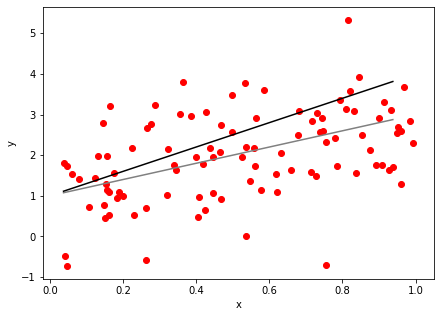

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array(X)
y=np.array(Y)

plt.figure(figsize=(7,5))
plt.xlabel('x')
plt.ylabel('y');

plt.scatter(x[:,1],y,c='red');

x1=np.arange(x[:,1].min(),x[:,1].max(),0.1)
plt.plot(x1, w_t[0]+x1*w_t[1], color='gray');
plt.plot(x1, w[0]+x1*w[1], color='black');

### 予測
入力データのリスト`X`と評価対象のパラメータ`w`を引数として受け取り各入力データに対する予測値のリスト`Y_pred`を返す関数`predict()`を実装してください。

In [218]:
# パラメータwで予測
def predict(X, w):
    Y_pred = []
    for x in X:
        Y_pred.append( w[0] * x[0] + w[1] * x[1] )
    return Y_pred

以下のセルを実行して関数の動作を確認してください。

In [219]:
Y_pred = predict(X, w)
print(Y_pred[:5])

[2.2008924074608123, 2.6665684957030367, 2.731179270443856, 2.0632225077486526, 2.8722980262567965]


以下のセルを実行して`True`が出力されるか確認してください。

In [220]:
print(n==len(predict(X, w)))

True


### RMSE（平均二乗誤差平方根）
真の出力値のリスト`Y`と予測値のリスト`Y_pred`を受け取りそれらのRMSE（平均二乗誤差平方根）の値を返す関数`rmse()`を実装してください。

In [221]:
# RMSEを計算
def rmse(Y, Y_pred):
    RMSE = 0
    for i in range(len(Y)):
        RMSE += ( Y[i] - Y_pred[i] ) * ( Y[i] - Y_pred[i] ) / len(Y)
    RMSE = math.sqrt(RMSE)
    return RMSE

以下のセルを実行して関数の動作を確認してください。

In [222]:
RMSE = rmse(Y, Y_pred)
print(RMSE)

0.0


以下のセルを実行して`True`が出力されるか確認してください。真のパラメータと評価対象のパラメータが同じでデータのノイズが0であればRMSEは0になります。

In [223]:
print(0==rmse(Y, Y_pred))

True


### MAE（平均絶対誤差）
真の出力値のリスト`Y`と予測値のリスト`Y_pred`を受け取りそれらのMAE（平均絶対誤差）の値を返す関数`mae()`を実装してください。

In [224]:
# MAEを計算
def mae(Y, Y_pred):
    MAE = 0
    for i in range(len(Y)):
        MAE += math.fabs( Y[i] - Y_pred[i] )  / len(Y)
    return MAE

以下のセルを実行して関数の動作を確認してください。

In [225]:
MAE = mae(Y, Y_pred)
print(MAE)

0.0


以下のセルを実行して`True`が出力されるか確認してください。真のパラメータと評価対象のパラメータが同じでデータのノイズが0であればMAEは0になります。

In [226]:
print(0==mae(Y, Y_pred))

True


### 決定係数
真の出力値のリスト`Y`と予測値のリスト`Y_pred`を受け取りそれらの決定係数の値を返す関数`r2()`を実装してください。

In [227]:
# 決定係数を計算
def r2(Y, Y_pred):
    Y_mean = 0
    for y in Y:
        Y_mean += y/len(Y)
    MSE1 = 0
    MSE2 = 0

    for i in range(len(Y)):
        MSE1 += ( Y[i] - Y_pred[i] ) * ( Y[i] - Y_pred[i] ) / len(Y)
        MSE2 += ( Y[i] - Y_mean ) * ( Y[i] - Y_mean ) / len(Y)
    R2 = 1 - (MSE1/MSE2)
    return R2

以下のセルを実行して関数の動作を確認してください。

In [228]:
R2 = r2(Y, Y_pred)
print(R2)
print(1==R2)

1.0
True


以下のセルを実行して`True`が出力されるか確認してください。真のパラメータと評価対象のパラメータが同じでデータのノイズが0であればR2は1になります。

In [229]:
print(1==R2)

True


## 効率的な実装方法

In [185]:
# 内包表記で以下のようにデータ生成も可能
X = [ (1, random.random() ) for i in range(n) ]
Y = [ w_t[0] * x[0] + w_t[1] * x[1] + random.gauss(0, sigma) for x in X ]

In [186]:
# パラメータwで予測
Y_pred = [ w[0] * x[0] + w[1] * x[1] for x in X ] 

In [187]:
# RMSEを計算
RMSE = math.sqrt( sum( [ (y-yp)**2/n for (y, yp) in zip(Y, Y_pred) ]  ) )
print(RMSE)

0.0


In [188]:
# MAEを計算
MAE = sum( [ math.fabs(y-yp)/n for (y, yp) in zip(Y, Y_pred) ]  )
print(MAE)

0.0


In [189]:
# 決定係数を計算
Y_mean = sum(Y) / n
MSE1 = sum( [ (y-yp)**2/n for (y, yp) in zip(Y, Y_pred) ] )
MSE2 = sum( [ (y-Y_mean)**2/n for y in Y ] )
R2 = 1 - (MSE1/MSE2)
print(R2)

1.0
